# COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the user, please mention here.* 

*If you are planning to implement a program with Object Oriented Programming style, please check the bottom of the this ipynb file*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.1. Download Dataset

If you want to know how data has been saved in pickle file: see this [ipynb file](https://drive.google.com/file/d/1ZQUVBzgH7N2EbiyE3WTPx7JNe2eRTs36/view?usp=sharing)

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
import pandas as pd

from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1lTD6bgRkmwguGAr30v-r0KBPdtnVneLb'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.pkl')  

id = '1pCUdlZMoj99UZHtqFeza86fvVQfFmDFX'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.pkl')  
import pickle

training_data= pickle.load(open("training_data.pkl","rb"))
testing_data = pickle.load(open("testing_data.pkl","rb"))

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data[0][0], training_data[0][1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 8000
Size of testing dataset: 2000
------------------------------------
------------------------------------
Sample Data
LABEL: neg / SENTENCE: hopeless for tmr :(
------------------------------------


## 1.2. Preprocess data



*You are required to describe which data preprocessing techniques were conducted with justification of your decision. *

**1** The first task is to remove the @usename strings, punctuations, and website 
links as they contribute no meaning to the sentences 


**2** The second task is to reserve the emoticons,and the rest words are changed to the lower-case form. Because it is the sentiment analysis, emoticons does not contribute meaning to the sentence in our analysis. By changing all the words to the lower-case, it will help us to analysis the meaning of the words as Python is case-sensitive 

**3** The third task is to look at the contraction of the data and to change it. This helps to standardlize the words, which is valuable in this analysis. 

**4** the fourth task is to remove the stop words which do not add much meaning to the sentence we are going to analysis. 


**5** the last task is to start the Lemmatisation of the words that can be identified as a single form. This is nessesary in the sentiment analysis as the lemaatisation is based on the meaning of the words 



In [ ]:
#remove  "@followed by the username" in the strings
import re
def remove_name(x):
    x=re.sub("@\S+","",x)
    return x
training_data_data=[(x,remove_name(y)) for (x, y) in training_data]
testing_data_data=[(x,remove_name(y)) for (x, y) in testing_data]
#remove website strings
def remove_webname(x):
    x=re.sub("http\S+","",x)
    return x 
training_data_data=[(x,remove_webname(y)) for (x, y) in training_data_data]
testing_data_data=[(x,remove_webname(y)) for (x, y) in testing_data_data]
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', '','']

#remove punctuations 
def remove_punctuation(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x

new_training_data_list=[(x,remove_punctuation(y)) for x,y in training_data_data]
new_testing_data_list=[(x,remove_punctuation(y)) for x,y in  testing_data_data]

The emoticons in the list are to be reserved, and the rest words are changed to the lower-case form. Because it is the sentiment analysis, emoticons does not contribute meaning to the sentence in our analysis 




In [ ]:
# to reserve the emoticons in the list and change the rest to the lower-case
import regex
EMOTICONS = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      <3                         # heart
    )"""
EMOTICON_RE = regex.compile(EMOTICONS, regex.VERBOSE | regex.I | regex.UNICODE)
training=[]
for i in new_training_data_list:
                    if EMOTICON_RE.search(i[1]):
                                      value=i[1]
                    else:
                       value=i[1].lower()
                    training.append((i[0],value))

testing=[]
for i in new_testing_data_list:
                    if EMOTICON_RE.search(i[1]):
                                      value=i[1]
                    else:
                       value=i[1].lower()
                    testing.append((i[0],value))




# To look at the contraction of the data and to change it. This helps to standardlize the words, which is valuable in this analysis 


In [ ]:

contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have","cant": "cannot","youre": "you are"}
def contract(s):
  for k in contraction_dict:
                     if k in s:
                        s = s.replace(k,contraction_dict[k])
  return s 
new_data_training=[(x,contract(y)) for x,y in training ] 
new_data_testing=[(x,contract(y)) for x,y in testing] 

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize
stop_words = sw.words()
a=[(x,word_tokenize(y)) for x, y in new_data_training]
b=[(x,word_tokenize(y)) for x, y in new_data_testing]
def stop(A):
      c=[w for w in A if not w in stop_words]
      return c
training=[(x,stop(y)) for x, y in a]
testing=[(x,stop(y)) for x, y in b]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


To start the Lemmatisation of the words that can be identified as a single form. This is nessesary in the sentiment analysis as the lemaatisation is based on the meaning of the words 


In [ ]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
my_training=[]
my_testing=[]
lemmatizer = WordNetLemmatizer()
for a in training:
      my_training.append((a[0],list(map(lemmatizer.lemmatize,a[1]))))
for b in testing:
      my_testing.append((b[0],list(map(lemmatizer.lemmatize,b[1]))))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2 - Model Implementation

## 2.1. Word Embeddings

*You are required to describe which model was implemented (i.e. Word2Vec with CBOW, FastText with SkipGram, etc.) with justification of your decision *

# FastText is used as the model for two reasons. using FastTest is to "take into account the internal structure of words while learning word representations, which could be very useful for morphologically rich languages, and also for words that occur rarely"(Wei,2018). Secondly, SkipGram method is dependent on the strong assumption that all the contextual words predicted are independent, while in the RNN model, the previous results are factored as the inputs to the current state for the prediction. Thus, SkipGram is not used here. Instead, i opt for the use of CBOW.


(https://www.oreilly.com/library/view/deep-learning-essentials/9781785880360/12fe4a55-a5d0-4712-bd68-ac043b87a87e.xhtml#:~:text=The%20main%20advantage%20of%20FastText,for%20words%20that%20occur%20rarely.)


### 2.1.1. Data Preprocessing for Word Embeddings

Dowloading the Ted scrip from the google drive [lab2] 


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pprint
import re
from lxml import etree 
from gensim.models import Word2Vec
import warnings
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize



# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# For data processing

nltk.download('punkt')

# For implementing the word2vec family of algorithms

warnings.simplefilter(action='ignore', category=FutureWarning)
id = '1B47OiEiG2Lo1jUY6hy_zMmHBxfKQuJ8-'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ted_en-20160408.xml')  
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')

# Getting contents of <content> tag from the xml file
target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data preprocessing for the TedScripts 
1.   the first is to remove "Sound-effect labels" using regular expression (regex)[lab 2] 
2.   the second is to tokenising the sentence as it will lead to the word vector representaio
3. punctuations do not add meanings to the sentences.Hence they are deleated 
4. all capital characters should be converted to the lowercase as python is case senesitive in processing the words 












In [ ]:
# Removing "Sound-effect labels" using regular expression (regex) (i.e. (Audio), (Laughter))
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# Tokenising the sentence to process it by using NLTK library
sent_text=sent_tokenize(content_text)

# Removing punctuation and changing all characters to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# Tokenising each sentence to process individual word
sentences=[]
sentences=[word_tokenize(sentence) for sentence in normalized_text]


*You are required to describe which preprocessing techniques were used with justification of your decision.*

The training data is also preprocessed by 


1.   removing the @usernames as it does add meaning to the sentecnes
2.   removing the website links(http) as they do not add meanings to the sentecnes 
3.  removing punctuations as they are not useful in this analysis 
4. reserving the emoticons in the list and change the rest to the lower-case as in the sentiment analysis, we actually care about the sentiment meaning
5. changing contractions to its complete forms 
6. removing the stop words as they do not add much meanings to the sentences 
7. tokenziing the sentences for the later stage of word processing 





In [ ]:
#remove  "@followed by the username" in the strings as they are not useful for this analysis 
import re
def remove_name(x):
    x=re.sub("@\S+","",x)
    return x
training_data_data=[(x,remove_name(y)) for (x, y) in training_data]
testing_data_data=[(x,remove_name(y)) for (x, y) in testing_data]
#remove website strings
def remove_webname(x):
    x=re.sub("http\S+","",x)
    return x 
training_data_data=[(x,remove_webname(y)) for (x, y) in training_data]
testing_data_data=[(x,remove_webname(y)) for (x, y) in testing_data]


#remove punctuations as they are not useful in this analysis 
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', '','']

def remove_punctuation(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x

new_training_data_list=[(x,remove_punctuation(y)) for x,y in training_data_data]
new_testing_data_list=[(x,remove_punctuation(y)) for x,y in  testing_data_data]



# to reserve the emoticons in the list and change the rest to the lower-case
import regex
EMOTICONS = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      <3                         # heart
    )"""
EMOTICON_RE = regex.compile(EMOTICONS, regex.VERBOSE | regex.I | regex.UNICODE)
training=[]
for i in new_training_data_list:
                    if EMOTICON_RE.search(i[1]):
                                      value=i[1]
                    else:
                       value=i[1].lower()
                    training.append((i[0],value))

testing=[]
for i in new_testing_data_list:
                    if EMOTICON_RE.search(i[1]):
                                      value=i[1]
                    else:
                       value=i[1].lower()
                    testing.append((i[0],value))



# to look at the contraction of the data and to change it as this will standardlize the data and helps the analysis 
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have","cant": "cannot","youre": "you are"}
def contract(s):
  for k in contraction_dict:
                     if k in s:
                        s = s.replace(k,contraction_dict[k])
  return s 
new_data_training=[(x,contract(y)) for x,y in training] 
new_data_testing=[(x,contract(y)) for x,y in testing] 

import nltk
nltk.download('punkt')
nltk.download('stopwords')

# to remove the stop words as they do not add much meanings to the sentences and thus are not useful
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize
stop_words = sw.words()
a=[(x,word_tokenize(y)) for x, y in new_data_training]
b=[(x,word_tokenize(y)) for x, y in new_data_testing]
def stop(A):
      c=[w for w in A if not w in stop_words]
      return ' '.join(c)
training=[(x,stop(y)) for x, y in a]
testing=[(x,stop(y)) for x, y in b]



# to start the Lemmatisation of the words that can be identified as a single form. This is nessesary in the sentiment analysis as the lemaatisation is based on the meaning of the words 
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
my_training=[]
my_testing=[]
lemmatizer = WordNetLemmatizer()
for a in training:
      my_training.append((a[0],lemmatizer.lemmatize(a[1])))
for b in testing:
      my_testing.append((b[0],lemmatizer.lemmatize(b[1])))

### 2.1.2. Build Word Embeddings Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

The size of embedding is set to 100 as on the one hand, the size can not be too large, which will lead to the curse of dimensionality which increase the computattional time, while on the other hand, it is suggested in the paper of Mikolov(Jeffrey Pennington, 2014] that the increase in dimensionality bring in benefits.Grounded in the emprical evidences from Section 3.1, embedding size of 100 is chosen here. 

As for the window size, it is set to be 7 following the empirical evidence from Section 3.1. Theoretically,in sentiment analysis, as we are interested in the meaning of the words, the contextual words we aim to analysis should be sufficiently large. 

To set sg equal to 0, due to the Skip gram's strong assumption on independence of the contetxual words, which is not realistic from the RNN's point of view. 

Minmum count is set to 1, which is to include  as much as possibel in the analysis. There might be some less frequent words with lexion embedings of value 1 or 2. Those words are also important in our analysis and thus can not be ignored


Finally, the dowloaded model of Ted talks is combined with the training and test words after the preprocessing. This is to increase the accuracy score of the model evaluation in the later stage. When the model trained has larger amount of the words, it is expecetd to perform better. 

In [ ]:
from gensim.models import  FastText
size=100
window=7
min_count=1
workers=8
sg=0
q=[b for a,b in my_training if len(b)>0 ]
g=[b for a,b in my_testing if len(b)>0 ]
total=q+g+sentences
e=q+g

### 2.1.3. Train Word Embeddings Model

In [ ]:
import numpy as np
import torch
wv_sg_model = FastText(sentences=total, size=size, window=window, min_count=5, workers=workers, sg=sg)
word_list=[]
for line in q:
   for word in line:
        if word not in word_list:
                     word_list.append(word)
word_embedings_training=[]
for line in q:
        sentence=[]
        for word in line:
              try: 
                   sentence.append(wv_sg_model[word])
              except:
                   pass
        word_embedings_training.append(sentence)

word_embedings_testing=[]
for line in g:
        sentence=[]
        for word in line:
             try:
                  sentence.append(wv_sg_model[word])
             except:
                  pass
        word_embedings_testing.append(sentence)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


## 2.2. Lexicon Embeddings

### 2.2.1. Lexicon-based Embedding

*[Optional] You are required to describe why you would like to use more than one-dimensional embedding.*

In [ ]:
# Please comment your code 
import pandas as pd 
negative = pd.read_csv("https://gist.githubusercontent.com/x2125001/a84405fe1529e81c6f3d4f8955a2d744/raw/2c8e3f886a9d3133947e08f62442b56bb1f11380/negative.txt",header=None)
negative=[a for a in negative[0]]
positive=pd.read_csv("https://gist.githubusercontent.com/x2125001/a84405fe1529e81c6f3d4f8955a2d744/raw/2c8e3f886a9d3133947e08f62442b56bb1f11380/positive.txt",header=None)
positive=[a for a in positive[0]]
Lexicon_Embedding_dic={}
for a in e:
        for word in a:
            if word in negative:
                Lexicon_Embedding_dic[word]=1
            elif word in positive:
                Lexicon_Embedding_dic[word]=2
            else: Lexicon_Embedding_dic[word]=0

In [ ]:
Lexicon_Embedding_training=[]
for line in q:
    b=[]
    for word in line:
       b.append(Lexicon_Embedding_dic[word])
    Lexicon_Embedding_training.append(b)

Lexicon_Embedding_testing=[]
for line in g:
    b=[]
    for word in line:
       b.append(Lexicon_Embedding_dic[word])
    Lexicon_Embedding_testing.append(b)

## 2.3. Bi-directional RNN Sequence model

### 2.3.1. Apply/Import Word Embedding and Lexicon Embedding

TO concatenate the two embeddings together 


In [ ]:
# Please comment your code
import torch
embedings_training=[]
for i in range(len(word_embedings_training)):
                    sentence=[]
                    for j in range(len(word_embedings_training[i])):
                          b=list(word_embedings_training[i][j])
                          c=Lexicon_Embedding_training[i][j]
                          b.append(c)
                          sentence.append(b)
                    embedings_training.append(sentence)

embedings_testing=[]
for i in range(len(word_embedings_testing)):
                    sentence=[]
                    for j in range(len(word_embedings_testing[i])):
                          b=list(word_embedings_testing[i][j])
                          c=Lexicon_Embedding_testing[i][j]
                          b.append(c)
                          sentence.append(b)
                    embedings_testing.append(sentence) 


### 2.3.2. Build Sequence Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

The sequence length is set to 25 which is equal to the maxmum length of the sentences in the training and testing data set plus five

Number of inputs is set to 101 as the for each word, there is a vector representaion of 101 in length. 

Number of class is set to 2, which is corresponding to the number of lables in the training data set "postive" and "Negative"


Leaning rate is determined at 0.0005777777777777 between 0.001 and 0.0001. 
When it is 0.001, it is learning too fast,which might lead to overfiting.And because we have a bigger batch size, we should not have the learning rate that is too small. Thus,0.005777 is chosen here. 

Number of hidden layer is set be as large as 100 given the large dimension of the input as 101. it is a complex issue, which requires larger number of hidden layers. 


In [ ]:
# Please comment your code
# The sequence length is set to 25 which is equal to the maxmum length of the sentences in the training and testing data set plus five.  
seq_length = 25
import pandas as pd
import numpy as np
#
def encode_and_add_padding(sentences, seq_length):
    sent_encoded = []
    for sent in sentences:
        c=sent
        if len(c) < seq_length:
          for i in range(25-len(c)):
              c.append([0 for j in range(101)])
        sent_encoded.append(c)
    return sent_encoded

train_pad_encoded = encode_and_add_padding(embedings_training, seq_length )
train_pad_encoded=np.asarray(train_pad_encoded)
testing_pad_encoded = encode_and_add_padding(embedings_testing, seq_length )
testing_pad_encoded=np.asarray(testing_pad_encoded)

Label encoding for the training data


In [ ]:
training_label=[]
for i in my_training:
      if len(i[1])<=0:continue
      training_label.append(i[0])
testing_label=[]
for i in my_testing:
       if len(i[1])<=0:continue
       testing_label.append(i[0])       
import numpy as np

from sklearn.preprocessing import LabelEncoder

unique_labels = np.unique(training_label)

lEnc = LabelEncoder()
# Please encode the labels (Do NOT add ne)
label_train_encoded = lEnc.fit_transform(training_label)
label_test_encoded= lEnc.fit_transform(testing_label)

In [ ]:
import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 22
learning_rate = 0.0005777777777777


In [ ]:
import torch
# You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import torch.nn as nn
import torch.nn.functional as F

class Bi_RNN_Model(nn.Module):
    def __init__(self):
        super(Bi_RNN_Model, self).__init__()
        # set the bidirectional to True
        self.rnn = nn.RNN(n_input, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(2*n_hidden,n_class)

    def forward(self, x):        
        x, h_n = self.rnn(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        output = self.linear(hidden_out)
        return output



### 2.3.3. Train Sequence Model

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [ ]:
from sklearn.metrics import accuracy_score
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
print(classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4))

Epoch: 1, train loss: 42.92588
Epoch: 2, train loss: 21.29506
Epoch: 3, train loss: 22.48330
Epoch: 4, train loss: 21.84997
Epoch: 5, train loss: 21.51405
Epoch: 6, train loss: 21.29108
Epoch: 7, train loss: 21.13336
Epoch: 8, train loss: 20.98617
Epoch: 9, train loss: 20.86657
Epoch: 10, train loss: 20.73856
Epoch: 11, train loss: 20.63213
Epoch: 12, train loss: 20.51148
Epoch: 13, train loss: 20.40532
Epoch: 14, train loss: 20.28353
Epoch: 15, train loss: 20.15637
Epoch: 16, train loss: 20.01383
Epoch: 17, train loss: 19.85843
Epoch: 18, train loss: 19.71669
Epoch: 19, train loss: 19.56661
Epoch: 20, train loss: 19.41047
Epoch: 21, train loss: 19.25019
Epoch: 22, train loss: 19.06828
Finished Training
              precision    recall  f1-score   support

           0     0.6302    0.5951    0.6122       988
           1     0.6187    0.6529    0.6353       994

    accuracy                         0.6241      1982
   macro avg     0.6245    0.6240    0.6238      1982
weighted avg   

# 3 - Evaluation


## 3.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)

In [ ]:
size=100
window=7
min_count=1
workers=2
sg=0
wv_cbow_model = FastText(sentences=total, size=size, window=window, min_count=min_count, workers=workers, sg=sg)
wv_cbow_model.wv.save_word2vec_format('combined_cbow_w2v.txt', binary=False)

!git clone https://github.com/stanfordnlp/GloVe.git
vectors_file="/content/combined_cbow_w2v.txt"
with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]
vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)
print("Vocab size: ",str(vocab_size))

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}
# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T
def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)

        print("%s:" % filenames[i])
        print('ACCURACY TOP1: %.2f%% (%d/%d)' %
            (np.mean(val) * 100, np.sum(val), len(val)))
        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count
correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')
print('Questions seen/total: %.2f%% (%d/%d)' %
    (100 * count_tot / float(full_count), count_tot, full_count))
print('Semantic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_sem / float(count_sem), correct_sem, count_sem))
print('Syntactic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_syn / float(count_syn), correct_syn, count_syn))
print('Total accuracy: %.2f%%  (%i/%i)' % (100 * correct_tot / float(count_tot), correct_tot, count_tot))




Cloning into 'GloVe'...
remote: Enumerating objects: 595, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 595 (delta 0), reused 1 (delta 0), pack-reused 592
Receiving objects: 100% (595/595), 222.33 KiB | 6.01 MiB/s, done.
Resolving deltas: 100% (338/338), done.
Vocab size:  60037
capital-common-countries.txt:
ACCURACY TOP1: 0.59% (3/506)
capital-world.txt:
ACCURACY TOP1: 0.28% (5/1801)
currency.txt:
ACCURACY TOP1: 0.00% (0/106)
city-in-state.txt:
ACCURACY TOP1: 0.27% (4/1464)
family.txt:
ACCURACY TOP1: 11.05% (42/380)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 57.20% (532/930)
gram2-opposite.txt:
ACCURACY TOP1: 79.50% (477/600)
gram3-comparative.txt:
ACCURACY TOP1: 64.19% (855/1332)
gram4-superlative.txt:
ACCURACY TOP1: 80.48% (903/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 53.88% (569/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 20.20% (277/1371)
gram7-past-tense.txt:
ACCURACY TOP1: 10.77% (168/1560)
g

Visualize the results by 
trying dimentionality size in [100,300,500,1000] for Word2vec,
window szie in [1,7,9,11], minimum count in [1],and method in ["cbow":0, "skip gram":1]





In [ ]:

def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)
        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count


workers=10
dimension=[]
window_size=[]
min_count_list=[]
Syntactic_accuracy=[]
Semantic_accuracy=[]
Total_accuracy=[]
method=[]
i=1
for size in [100,300,500]:
     for window in [1,7,9,]:
         for min_count in [1]:
            for sg in [0,1]:
                wv_cbow_model = FastText(sentences=total, size=size, window=window, min_count=min_count, workers=workers, sg=sg)
                wv_cbow_model.wv.save_word2vec_format('combined_cbow_w2v.txt', binary=False)
                i+=1
                print(i)
                !git clone https://github.com/stanfordnlp/GloVe.git
                vectors_file="/content/combined_cbow_w2v.txt"
                with open(vectors_file, 'r') as f:
                     vectors = {}
                     for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
                        vals = line.rstrip().split(' ')
                        vectors[vals[0]] = [float(x) for x in vals[1:]]
                vocab_words=list(vectors.keys())
                vocab_size = len(vocab_words)
                print("Vocab size: ",str(vocab_size))

                vocab = {w: idx for idx, w in enumerate(vocab_words)}
                ivocab = {idx: w for idx, w in enumerate(vocab_words)}

                vector_dim = len(vectors[ivocab[0]])
                W = np.zeros((vocab_size, vector_dim))
                for word, v in vectors.items():
                         if word == '<unk>':
                               continue
                         W[vocab[word], :] = v
                W_norm = np.zeros(W.shape)
                d = (np.sum(W ** 2, 1) ** (0.5))
                W_norm = (W.T / d).T
                correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')
                Syntactic_accuracy.append(correct_syn / float(count_syn))
                Semantic_accuracy.append(correct_sem / float(count_sem))
                Total_accuracy.append(correct_tot / float(count_tot))
                window_size.append(window)
                min_count_list.append(min_count)
                method.append(sg)
                dimension.append(size)
dict_data={}
dict_data["model"]=["fastText" for i in range(18)]
dict_data["minimum_count"]= min_count_list
dict_data["dimension"]=dimension
dict_data["method"]=method 
dict_data["window_size"]=window_size
dict_data["Total_accuracy"]=Total_accuracy
dict_data["Semantic_accuracy"]= Semantic_accuracy
dict_data["Syntactic_accuracy"]= Syntactic_accuracy
table=pd.DataFrame(dict_data)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("method 0=cbow and method 1=skip gram")

table



method 0=cbow and method 1=skip gram


,model,minimum_count,dimension,method,window_size,Total_accuracy,Semantic_accuracy,Syntactic_accuracy
0,fastText,1,100,0,1,0.349965,0.019497,0.488253
1,fastText,1,100,1,1,0.389882,0.022786,0.543497
2,fastText,1,100,0,7,0.340679,0.011510,0.478423
3,fastText,1,100,1,7,0.408108,0.035706,0.563944
4,fastText,1,100,0,9,0.342065,0.012920,0.479799
5,fastText,1,100,1,9,0.402980,0.034531,0.557161
6,fastText,1,300,0,1,0.357588,0.020202,0.498771
7,fastText,1,300,1,1,0.410534,0.023726,0.572398
8,fastText,1,300,0,7,0.346500,0.011745,0.486582
9,fastText,1,300,1,7,0.419751,0.026310,0.584390


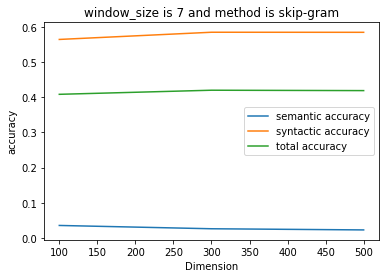

In [ ]:
 import matplotlib.pyplot as plt
 constant=table[(table["method"] == 1)]
 constant=constant[(constant["window_size"] == 7)]
 plt.plot(constant["dimension"], constant["Semantic_accuracy"], label = "semantic accuracy")
 plt.xlabel("Dimension")
 plt.ylabel("Semantic_Accuracy")
 plt.title('window_size is 7 and method is skip-gram')
 
 
 constant=table[(table["method"] == 1)]
 constant=constant[(constant["window_size"] == 7)]
 plt.plot(constant["dimension"], constant["Syntactic_accuracy"], label = "syntactic accuracy")
 plt.xlabel("Dimension")
 
constant=table[(table["method"] == 1)]
 constant=constant[(constant["window_size"] == 7)]
 plt.plot(constant["dimension"], constant["Total_accuracy"], label = "total accuracy")
 plt.xlabel("Dimension")
 plt.ylabel("accuracy")
plt.legend()

        


When we use the model of FastText, keep the minimum count of word as 1, and set up the window size as 7, the increase in the size of dimension does not apperas to dramtically increase the semantic accuracy , total accuracy, and syntactic accuracy. However, we can also see that for semantic accuracy and syntactic accuracy, increase the size of dimension generally increases the accurcy scores 







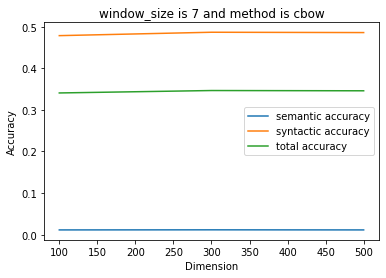

In [ ]:
 import matplotlib.pyplot as plt
 constant=table[(table["method"] == 0)]
 constant=constant[(constant["window_size"] == 7)]
 plt.plot(constant["dimension"], constant["Semantic_accuracy"], label = "semantic accuracy")
 plt.xlabel("Dimension")
 plt.ylabel("Semantic_Accuracy")
 plt.title('window_size is 7 and method is cbow')
 
 
 constant=table[(table["method"] == 0)]
 constant=constant[(constant["window_size"] == 7)]
 plt.plot(constant["dimension"], constant["Syntactic_accuracy"], label = "syntactic accuracy")
 plt.xlabel("Dimension")
 
constant=table[(table["method"] == 0)]
 constant=constant[(constant["window_size"] == 7)]
 plt.plot(constant["dimension"], constant["Total_accuracy"], label = "total accuracy")
 plt.xlabel("Dimension")
 plt.ylabel("Accuracy")
plt.legend()


**At for the methods of CBOW, the synatactic_accuracy, sematic accuracy, and total accuracy do not
 have significant change as we incerase the size of the dimension, as it is shown above.**

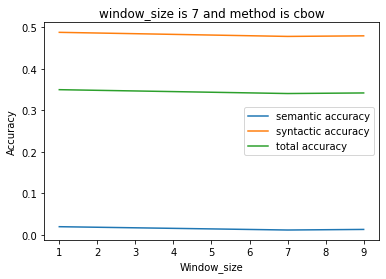

In [ ]:
 constant=table[(table["method"] == 0)]
 constant=constant[(constant["dimension"] == 100)]
 plt.plot(constant["window_size"], constant["Semantic_accuracy"], label = "semantic accuracy")
 plt.xlabel("Dimension")
 plt.ylabel("Semantic_Accuracy")
 plt.title('dimension is 100  and method is cbow')
 
 
 constant=table[(table["method"] == 0)]
 constant=constant[(constant["dimension"] == 100)]
 plt.plot(constant["window_size"], constant["Syntactic_accuracy"], label = "syntactic accuracy")
 plt.xlabel("Dimension")
 
constant=table[(table["method"] == 0)]
 constant=constant[(constant["dimension"] == 100)]
 plt.plot(constant["window_size"], constant["Total_accuracy"], label = "total accuracy")
 plt.xlabel("Window_size")
 plt.ylabel("Accuracy")
plt.legend()

The incrase in window size also does not benefit the three accuracy scores for CBOW and dimension 100, as it was shown above 


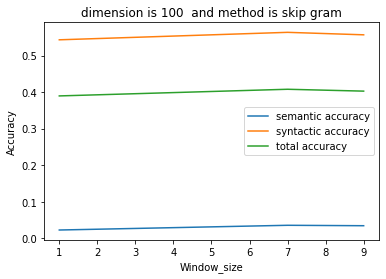

In [ ]:
 constant=table[(table["method"] == 1)]
 constant=constant[(constant["dimension"] == 100)]
 plt.plot(constant["window_size"], constant["Semantic_accuracy"], label = "semantic accuracy")
 plt.xlabel("Dimension")
 plt.ylabel("Semantic_Accuracy")
 plt.title('dimension is 100  and method is skip gram')
 
 
 constant=table[(table["method"] == 1)]
 constant=constant[(constant["dimension"] == 100)]
 plt.plot(constant["window_size"], constant["Syntactic_accuracy"], label = "syntactic accuracy")
 plt.xlabel("Dimension")
 
constant=table[(table["method"] == 1)]
 constant=constant[(constant["dimension"] == 100)]
 plt.plot(constant["window_size"], constant["Total_accuracy"], label = "total accuracy")
 plt.xlabel("Window_size")
 plt.ylabel("Accuracy")
plt.legend()

The incrase in window size also does not benefit the three accuracy scores for skipgram and dimension 100, as it was shown above 

In conclusion, it appears that the parameter choice as keeping the minimum count as 1 might have potentially lowered the all accuracy scores. However, it is needed in this model for the benefit of lexicon embeddings as some rare words might have positive or negative sentiments asscoiated with, which are valuable in our model 




## 3.2. Performance Evaluation


You are required to provide the table with precision, recall, f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)

In [ ]:
## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
# More details can be found from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
print(classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4))

              precision    recall  f1-score   support

           0     0.6186    0.5992    0.6087       988
           1     0.6137    0.6328    0.6231       994

    accuracy                         0.6160      1982
   macro avg     0.6161    0.6160    0.6159      1982
weighted avg     0.6161    0.6160    0.6159      1982



## 3.3. Hyperparameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)

Text(0, 0.5, 'Average Accuracy Score')

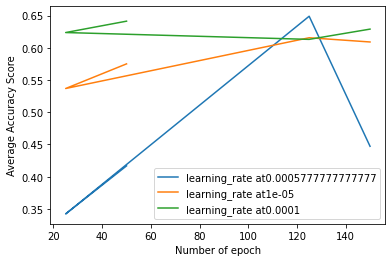

In [ ]:
f1_score=[]
learning=[]
optimal_epoch=[]

import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 50
learning_rate = 0.0005777777777777 
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
a=classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4,output_dict=True)
f1_score.append(a["weighted avg"]['f1-score'])
learning.append(learning_rate)
optimal_epoch.append(total_epoch) 

  






import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 25
learning_rate = 0.0005777777777777 
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
a=classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4,output_dict=True)
f1_score.append(a["weighted avg"]['f1-score'])
learning.append(learning_rate)
optimal_epoch.append(total_epoch) 

  



import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 125
learning_rate = 0.0005777777777777 
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
a=classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4,output_dict=True)
f1_score.append(a["weighted avg"]['f1-score'])
learning.append(learning_rate)
optimal_epoch.append(total_epoch) 




  
  
import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 150
learning_rate = 0.0005777777777777 
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
a=classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4,output_dict=True)
f1_score.append(a["weighted avg"]['f1-score'])
learning.append(learning_rate)
optimal_epoch.append(total_epoch) 




  
   
  
  
 
 import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 50
learning_rate = 0.00001
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
a=classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4,output_dict=True)
f1_score.append(a["weighted avg"]['f1-score'])
learning.append(learning_rate)
optimal_epoch.append(total_epoch) 

  






import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 25
learning_rate = 0.00001
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
a=classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4,output_dict=True)
f1_score.append(a["weighted avg"]['f1-score'])
learning.append(learning_rate)
optimal_epoch.append(total_epoch) 

  



import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 125
learning_rate = 0.00001
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
a=classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4,output_dict=True)
f1_score.append(a["weighted avg"]['f1-score'])
learning.append(learning_rate)
optimal_epoch.append(total_epoch) 




  
  
import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 150
learning_rate = 0.00001
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
a=classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4,output_dict=True)
f1_score.append(a["weighted avg"]['f1-score'])
learning.append(learning_rate)
optimal_epoch.append(total_epoch) 
 
 
 
 
  
  
 
import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 50
learning_rate = 0.0001
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
a=classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4,output_dict=True)
f1_score.append(a["weighted avg"]['f1-score'])
learning.append(learning_rate)
optimal_epoch.append(total_epoch) 

  






import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 25
learning_rate = 0.0001
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
a=classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4,output_dict=True)
f1_score.append(a["weighted avg"]['f1-score'])
learning.append(learning_rate)
optimal_epoch.append(total_epoch) 

  



import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 125
learning_rate = 0.0001
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
a=classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4,output_dict=True)
f1_score.append(a["weighted avg"]['f1-score'])
learning.append(learning_rate)
optimal_epoch.append(total_epoch) 




  
  
import numpy as np
n_input = 101 
n_class =2 

n_hidden = 100
batch_size = 256
total_epoch = 150
learning_rate = 0.0001
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_pad_encoded.shape[0],batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, train_pad_encoded.shape[0])]
        target_batch = label_train_encoded[ind:min(ind+batch_size,  train_pad_encoded.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)


        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')

## Prediction
model.eval()
outputs = model(torch.from_numpy(testing_pad_encoded).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# The returned report includes the 'weighted avg f1' we want (refer to the sample output)
from sklearn.metrics import classification_report
a=classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4,output_dict=True)
f1_score.append(a["weighted avg"]['f1-score'])
learning.append(learning_rate)
optimal_epoch.append(total_epoch) 
 
 
 dic={}
dic["optimal_epoch"]=optimal_epoch
dic["f1_score"]=f1_score
dic["learning_rate"]=learning 
Test_hy=pd.DataFrame(dic)
 

 
 
 
 
 
 
plt.plot( Test_hy[(Test_hy["learning_rate"] == 0.0005777777777777 )]["optimal_epoch"],  Test_hy[(Test_hy["learning_rate"] == 0.0005777777777777 )]["f1_score"], label = "learning_rate at{}".format( 0.0005777777777777 ))
plt.plot( Test_hy[(Test_hy["learning_rate"] == 1e-05 )]["optimal_epoch"],  Test_hy[(Test_hy["learning_rate"] ==1e-05 )]["f1_score"], label ="learning_rate at{}".format( 1e-05 ))
plt.plot( Test_hy[(Test_hy["learning_rate"] == 0.0001 )]["optimal_epoch"],  Test_hy[(Test_hy["learning_rate"] ==0.0001 )]["f1_score"], label ="learning_rate at{}".format( 0.0001 ))
plt.legend()


plt.xlabel("Number of epoch")
plt.ylabel("Average Accuracy Score")


From the graph above, we can see that for different learning rates, when they are smaller than 0.0001, the increase the number of epoch would lead to the increase in the accuracy score. However, it does not hold when the number of epoch reach the certain amount of threshhold. This is because that beyond this treshhold amount, the model begins to be overfiting, which would lower the accuracy score. As for the relatively large learning rate such as 0.0001, the model immediately shows the issue of overfitting at the begining as we increase the number of epoch. 

## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 

In [ ]:
# If you used OOP style, use this section